In [109]:
import torch
import numpy as np
import matplotlib.pyplot as plt


result_log = torch.load('../firefly-inverse-data/data/20191016-205855-7_result_log.pkl')
                        


result = {'true_theta': true_theta,
              'initial_theta': ini_theta,
              'theta': theta,
              'theta_log': theta_log,
              'loss_log': loss_log,
              'filename': filename,
              'num_batches': num_batches,
              'duration': toc-tic,
              'arguments': arg,
              'stderr': stderr
              }

In [110]:
true_theta = torch.zeros([len(result_log)-1, len(result_log[-1]['true_theta'])])
final_theta = torch.zeros([len(result_log)-1, len(result_log[-1]['theta'])])
stderr = torch.zeros([len(result_log)-1, len(result_log[-1]['stderr'])])

for i in range(len(result_log)-1):
    true_theta[i]=result_log[i]['true_theta']
    final_theta[i] = result_log[i]['theta'].data
    stderr[i] = result_log[i]['stderr']

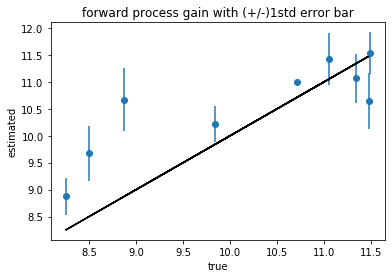

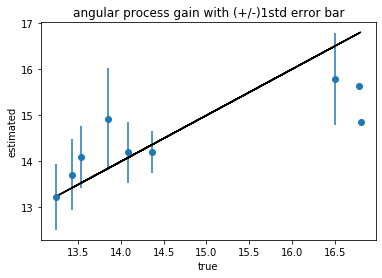

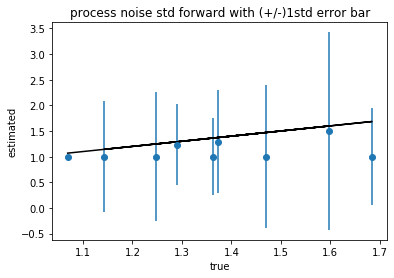

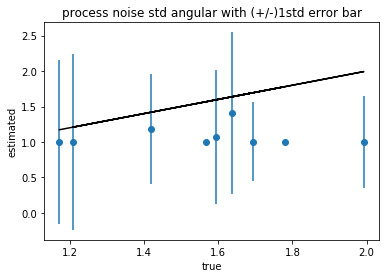

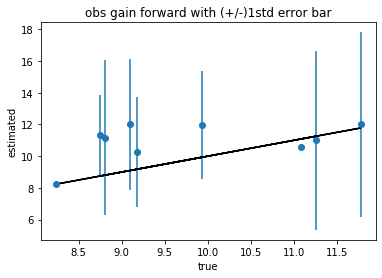

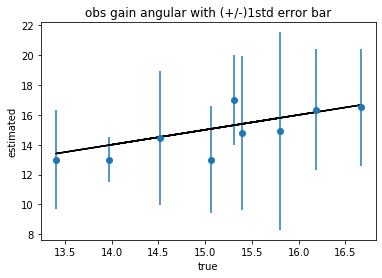

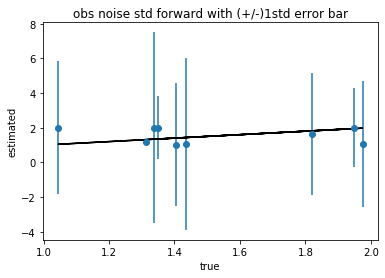

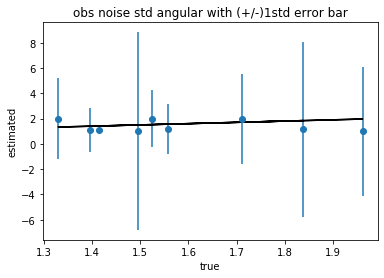

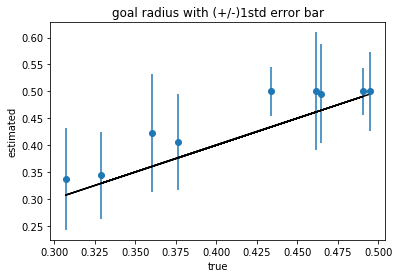

In [111]:
title_range = ['forward process gain', 'angular process gain', 'process noise std forward',
                          'process noise std angular', 'obs gain forward', 'obs gain angular', 'obs noise std forward',
                          'obs noise std angular', 'goal radius']
for i in range(len(true_theta[0,:])):
    mplotter(true_theta[:,i], final_theta[:,i], yerr =stderr[:,i] ,title = title_range[i]+' with (+/-)1std error bar')

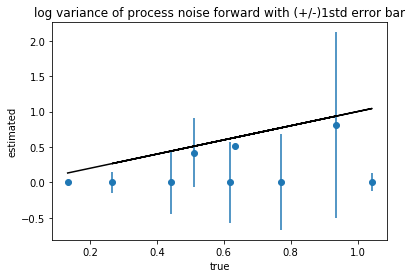

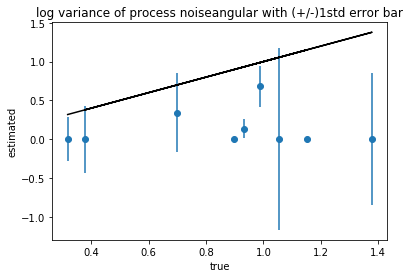

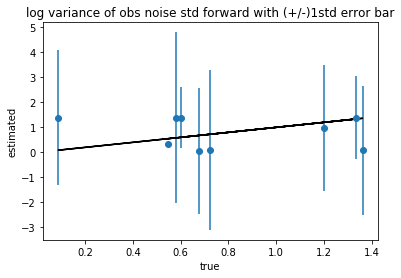

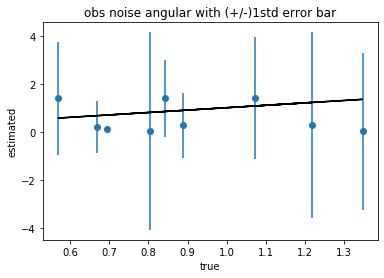

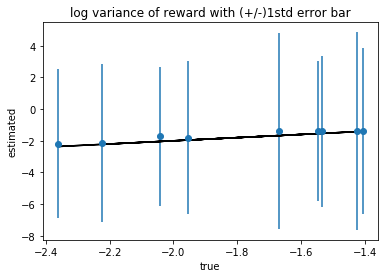

In [112]:
i_range = [2,3,6,7,8]
title_range = ['forward process gain', 'angular process gain', 'log variance of process noise forward',
                          'log variance of process noiseangular', 'obs gain forward', 'obs gain angular', 'log variance of obs noise std forward',
                          'obs noise angular', 'log variance of reward']
for i in i_range:
    mplotter(np.log(true_theta[:,i]**2), np.log(final_theta[:,i]**2), yerr =np.log(stderr[:,i]**2) ,title = title_range[i]+' with (+/-)1std error bar')

In [113]:
def mplotter(x, y, yerr, title = None, xlabel=None, ylabel=None):
    plt.figure()
    plt.errorbar(x, y, yerr , fmt='o')
    plt.plot(x, x, 'k-')    
    if xlabel is not None:
        plt.xlabel(xlabel)
    else: plt.xlabel('true')
            
    if ylabel is not None:
        plt.ylabel(ylabel)
    else: plt.ylabel('estimated')
        
    if title is not None:
        plt.title(title)
    